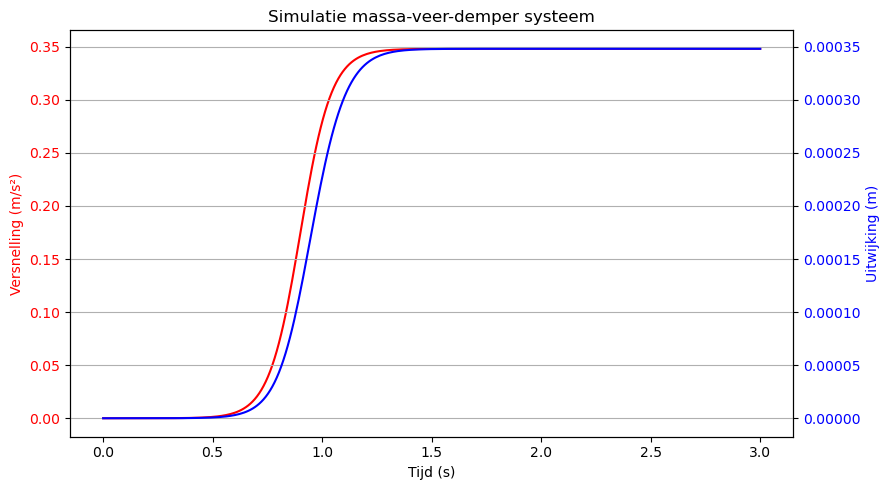

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import csv

m = 0.01  # massa (kg)
k = 10    # veerconstante (N/m)
c = 0.63  # dempingconstante (Ns/m)

with open('versnellingsprofiel_glad.csv') as file:
    reader = csv.reader(file)
    next(reader)  # sla kopregel over
    data = np.array([[float(r[0]), float(r[1])] for r in reader])
    tijd, a_input = data[:, 0], data[:, 1]

dt = tijd[1] - tijd[0]
x = np.zeros_like(tijd)
v = np.zeros_like(tijd)

for i in range(1, len(tijd)):
    a_net = a_input[i] - (c/m) * v[i-1] - (k/m) * x[i-1]
    v[i] = v[i-1] + dt * a_net
    x[i] = x[i-1] + dt * v[i]

fig, ax1 = plt.subplots(figsize=(9, 5))

ax1.set_xlabel('Tijd (s)')
ax1.set_ylabel('Versnelling (m/s²)', color='red')
ax1.plot(tijd, a_input, color='red', label='Versnelling a(t)')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Uitwijking (m)', color='blue')
ax2.plot(tijd, x, color='blue', label='Uitwijking x(t)')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Simulatie massa-veer-demper systeem')
plt.grid()
plt.tight_layout()
plt.show()